# REU - Machine Learning Tutorial
### Lecture - 4
### Prepared By - Mumtahin Habib

# Activation Function

## Why do we need them?

Activation functions are necessary to prevent linearity. Without them, the data would pass through the nodes and layers of the network only going through linear functions (a*x+b). The composition of these linear functions is again a linear function and so no matter how many layers the data goes through, the output is always the result of a linear function.

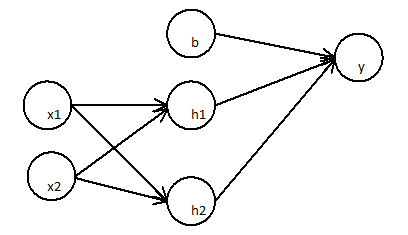

The first layer:

$$ h_1 = x_1 ∗ w_{x_1h_1} + x_2 ∗ w_{x_2h_1} $$
$$ h_2 = x_1 ∗ w_{x_1h_2} + x_2 ∗ w_{x_2h_2} $$


The subsequent layer

$$
\begin{align}
  y &= b ∗ w_{by} + h_1 * w_{h_1y} + h_2 * w_{h_2y} \\
   &= b ∗ w_{by} + (x_1 ∗ w_{x_1h_1} + x_2 ∗ w_{x_2h_1}) * w_{h_1y} + (x_1 ∗ w_{x_1h_2} + x_2 ∗ w_{x_2h_2}) * w_{h_2y} \\
   &= b ∗ w_{by} + x_1 (w_{h_1y} * w_{x_1h_1} + w_{x_1h_2} * w_{h_2y}) + x_2 (w_{h_1y} * w_{x_2h_1} + w_{x_2h_2} * w_{h_2y})\\
\end{align}
$$

Is just a simple linear regression

$$
\begin{align}
y &= b* W_0 + x_1 * W_1 + x_2 * W_2
\end{align}
$$


This can be shown to any number of layers, since linear combination of any number of weights is again linear. Any multilayer neural network will be as equal as simple linear regression!

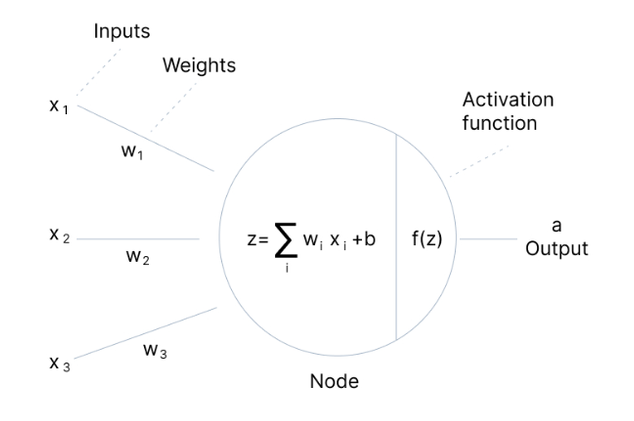

# Different Activation Functions

## Threshold Function:

This type of functions basically have only two values i.e., either a 0 as output or a 1 as output. They are mostly used in cases only when they need to classify only two types.

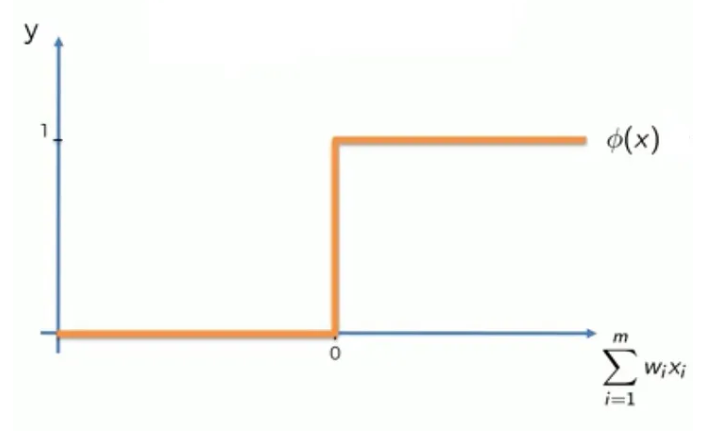

In the above diagram, Theta(X) is the output and

$σ(X) =1,  if X  \geq 0$ \\
and \\
$\sigma(X)=0 , if X<0$.

## Sigmoid or Logistic Activation Function
The Sigmoid Function curve looks like a S-shape.

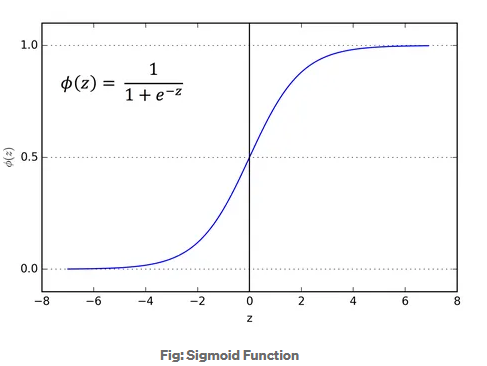

The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

The function is differentiable.That means, we can find the slope of the sigmoid curve at any two points. The function is monotonic but function’s derivative is not.

The logistic sigmoid function can cause a neural network to get stuck at the training time.


## ReLU (Rectified Linear Unit) Activation Function

The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.

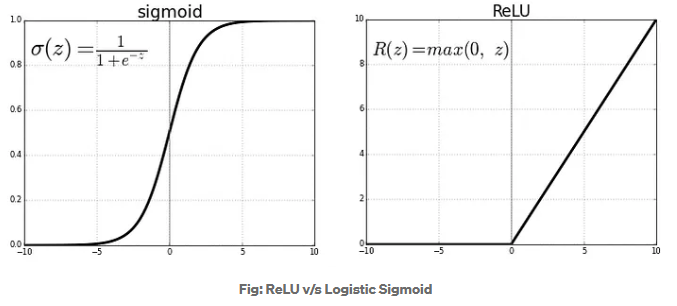

As you can see, the ReLU is half rectified (from bottom). f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero.

Range: [ 0 to infinity)

The function and its derivative both are monotonic.

But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.

# Derivation of Activation Function

When updating the curve, to know in which direction and how much to change or update the curve depending upon the slope.That is why we use differentiation in almost every part of Machine Learning and Deep Learning.

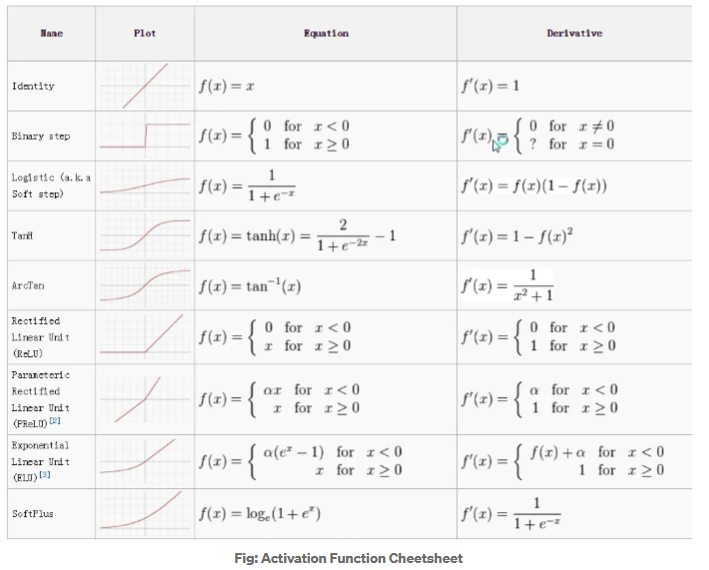

# A Network with Threshold

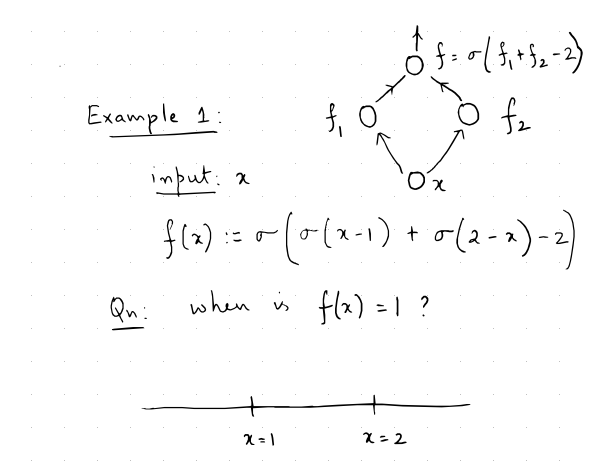

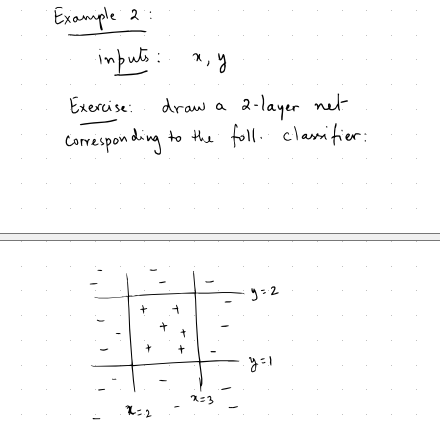

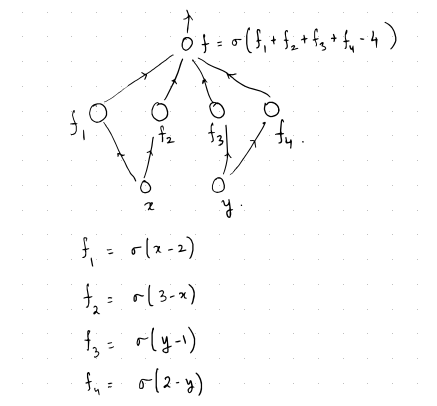

In [14]:
from IPython.display import Image, display
display(Image('/content/Capture91.PNG'))
display(Image('/content/Capture92.PNG'))
display(Image('/content/Capture93.PNG'))

# A 3-Layer Neural Network with Threshold Activation

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim


## Generate Synthetic Data

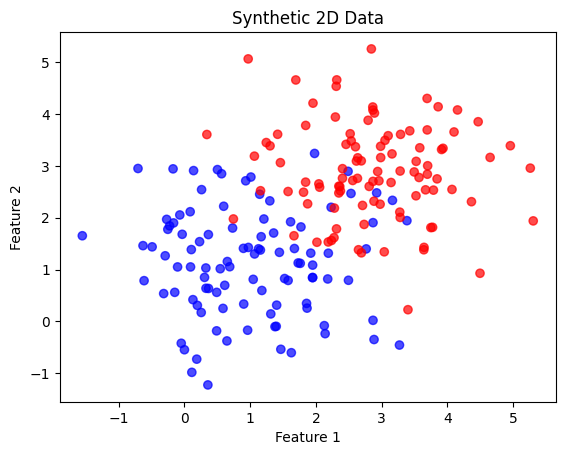

In [6]:
# Generate synthetic data
np.random.seed(0)
num_samples = 100

x0 = np.random.randn(num_samples, 2) + 1
y0 = np.zeros(num_samples)

x1 = np.random.randn(num_samples, 2) + 3
y1 = np.ones(num_samples)

X = np.vstack((x0, x1))
y = np.hstack((y0, y1))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Data')
plt.show()

## Define the Network

In [9]:
# Custom Threshold Activation Function using torch.autograd.Function
class ThresholdFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        # Save input for backward computation
        ctx.save_for_backward(input)
        # Thresholding logic
        return (input > 0.0).float()

    @staticmethod
    def backward(ctx, grad_output):
        # Retrieve saved input from context
        input, = ctx.saved_tensors
        # Compute gradient of loss w.r.t. input
        return grad_output * torch.ones_like(input)

# Threshold Network using custom threshold activation
class ThresholdNet(nn.Module):
    def __init__(self):
        super(ThresholdNet, self).__init__()
        self.layer1 = nn.Linear(2, 5)
        self.layer2 = nn.Linear(5, 5)
        self.layer3 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        x = ThresholdFunction.apply(x)  # Using custom threshold activation
        return x

In [10]:
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).view(-1, 1)

def train_model(model, X, y, epochs=1000, learning_rate=0.01):
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Initialize and train the threshold network
threshold_net = ThresholdNet()
train_model(threshold_net, X_tensor, y_tensor)

Epoch [100/1000], Loss: 50.0000
Epoch [200/1000], Loss: 50.0000
Epoch [300/1000], Loss: 50.0000
Epoch [400/1000], Loss: 50.0000
Epoch [500/1000], Loss: 50.0000
Epoch [600/1000], Loss: 50.0000
Epoch [700/1000], Loss: 50.0000
Epoch [800/1000], Loss: 50.0000
Epoch [900/1000], Loss: 50.0000
Epoch [1000/1000], Loss: 50.0000


In [16]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid_tensor).numpy().reshape(xx.shape)
    Z = (Z > 0.5).astype(np.float64)  # Threshold output to 0 and 1
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), edgecolors='k', marker='o')
    plt.show()

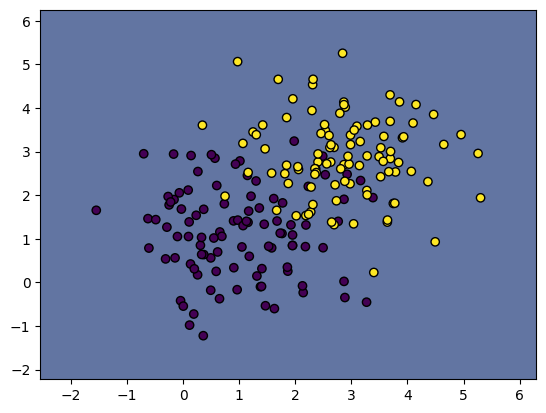

In [17]:
# Plot decision boundary for threshold network
plot_decision_boundary(threshold_net, X_tensor.numpy(), y_tensor.numpy())

# Sigmoid Activation Network

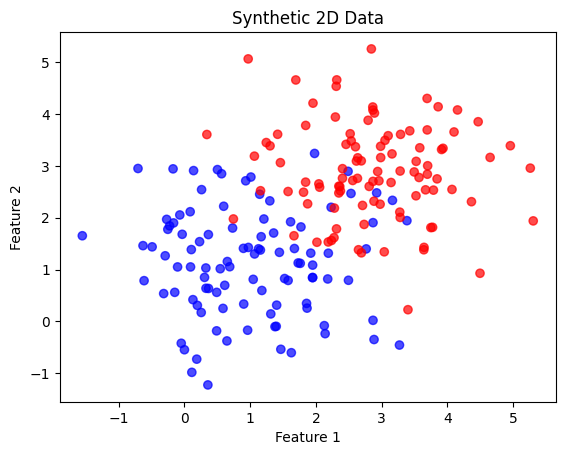

In [18]:
# Generate synthetic data
np.random.seed(0)
num_samples = 100

x0 = np.random.randn(num_samples, 2) + 1
y0 = np.zeros(num_samples)

x1 = np.random.randn(num_samples, 2) + 3
y1 = np.ones(num_samples)

X = np.vstack((x0, x1))
y = np.hstack((y0, y1))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Data')
plt.show()

In [20]:
class ThreeLayerSigmoidNet(nn.Module):
    def __init__(self):
        super(ThreeLayerSigmoidNet, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.sigmoid1 = nn.Sigmoid()
        self.fc2 = nn.Linear(10, 10)
        self.sigmoid2 = nn.Sigmoid()
        self.fc3 = nn.Linear(10, 1)
        self.sigmoid3 = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid1(x)
        x = self.fc2(x)
        x = self.sigmoid2(x)
        x = self.fc3(x)
        x = self.sigmoid3(x)
        return x

In [21]:
def train_network(net, X_tensor, y_tensor, num_epochs=100):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.1)

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = net(X_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [22]:
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).view(-1, 1)

sigmoid_net = ThreeLayerSigmoidNet()
train_network(sigmoid_net, X_tensor, y_tensor)

Epoch [10/100], Loss: 0.7272
Epoch [20/100], Loss: 0.7236
Epoch [30/100], Loss: 0.7203
Epoch [40/100], Loss: 0.7175
Epoch [50/100], Loss: 0.7150
Epoch [60/100], Loss: 0.7128
Epoch [70/100], Loss: 0.7109
Epoch [80/100], Loss: 0.7092
Epoch [90/100], Loss: 0.7078
Epoch [100/100], Loss: 0.7065


In [23]:
def plot_decision_boundaries(net, X, y, threshold=0.5):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    grid_points = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    Z = net(grid_points)
    Z = Z.detach().numpy().reshape(xx.shape)

    # Convert logits to binary class labels
    Z = (Z > threshold).astype(int)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

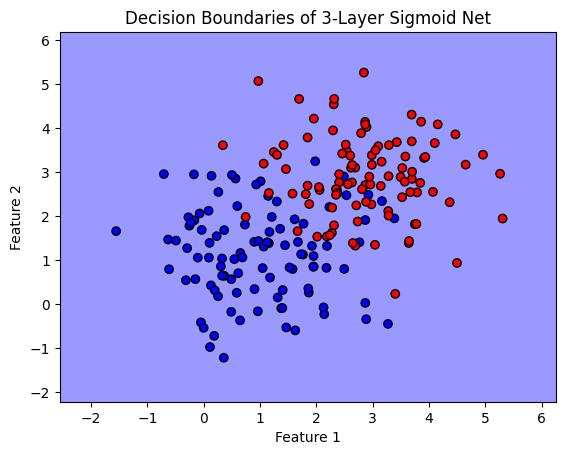

In [24]:
plt.title('Decision Boundaries of 3-Layer Sigmoid Net')
plot_decision_boundaries(sigmoid_net, X, y)

# ReLU Activation Network

In [25]:
class ThreeLayerReLUNet(nn.Module):
    def __init__(self):
        super(ThreeLayerReLUNet, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(10, 10)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()  # Final layer to map to [0, 1] range

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [26]:
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).view(-1, 1)

relu_net = ThreeLayerReLUNet()
train_network(relu_net, X_tensor, y_tensor)

Epoch [10/100], Loss: 0.7267
Epoch [20/100], Loss: 0.7220
Epoch [30/100], Loss: 0.7169
Epoch [40/100], Loss: 0.7119
Epoch [50/100], Loss: 0.7073
Epoch [60/100], Loss: 0.7026
Epoch [70/100], Loss: 0.6978
Epoch [80/100], Loss: 0.6928
Epoch [90/100], Loss: 0.6877
Epoch [100/100], Loss: 0.6824


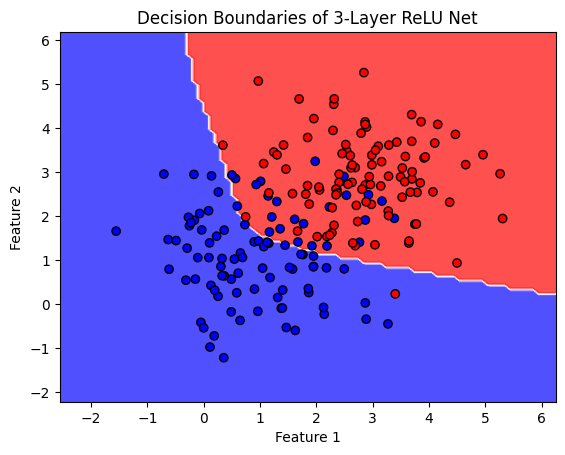

In [27]:
plt.title('Decision Boundaries of 3-Layer ReLU Net')
plot_decision_boundaries(relu_net, X, y)

# Vanishing Gradient

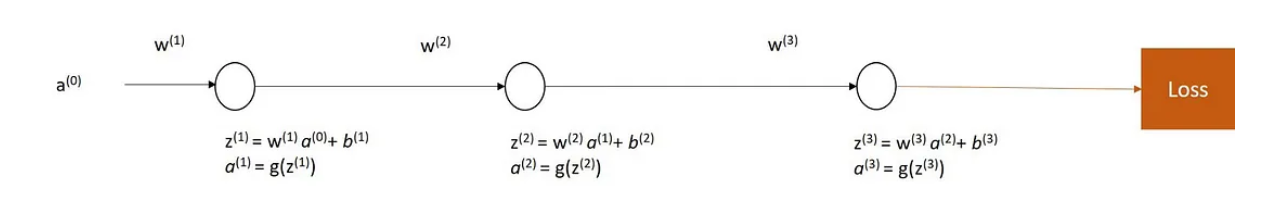

**How to update the weight of $w^{(1)}$ while optimizing?**

$w^{(1)} = w^{(1)} - \eta * \frac{\delta L}{\delta w^{(1)}}$

where, $\eta$ is the learning rate

**How to calculate $\frac{\delta L}{\delta w^{(1)}}$ ?**

**Backpropagation:** Chain Rule of derivatives.

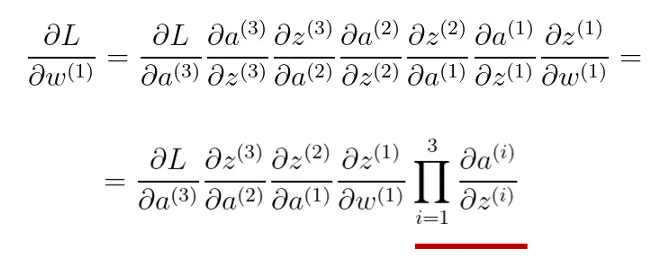

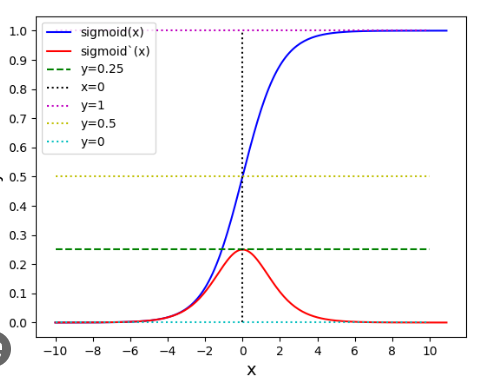

Now, the backpropagation is extremely dependent upon $\prod_{i = 1}^{3}\frac{\delta a^{(i)}}{\delta z^{(i)}}$. Which means, if each of them are of value 0.2, the multiplicative factor = 0.2 * 0.2 * 0.2 = 0.008

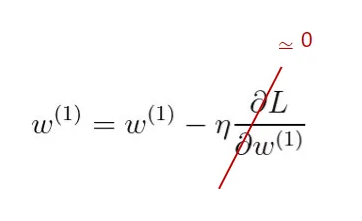

To sum up:



*   We use activation function to bring non-linearity to our model
*   We have to choose activation function wisely to avoid vanishing gradient problem.

The choices can be:


- **For Internal Layers**: use ReLU or Leaky ReLU or other vanishing gradient

- **For Output Layer:**

*   Binary classification: Sigmoid, tanh, threshold
*   Multiclass Classification: Softmax
*   Regression: No Activation Function

Highly Recommended Reading: [Vanishing gradient in Deep Neural Networks](https://towardsdatascience.com/vanishing-gradient-in-deep-neural-network-83953217c59f)

Recommended Reading: [The Differences between Sigmoid and Softmax Activation Functions](https://medium.com/arteos-ai/the-differences-between-sigmoid-and-softmax-activation-function-12adee8cf322)


Recommended Reading: [Understanding Vanishing and Exploding Gradients](https://medium.com/@sanjay_dutta/understanding-vanishing-and-exploding-gradients-a8a3c815ffbc)

Reccommended Reading: [Vanishing Gradient Problem in Deep Learning: Understanding, Intuition, and Solutions](https://medium.com/@amanatulla1606/vanishing-gradient-problem-in-deep-learning-understanding-intuition-and-solutions-da90ef4ecb54)


# Gradient Descent vs Stochastic Gradient Descent


Highly recommended to watch following two videos:
1.   [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)
2.   [Stochastic Gradient Descent](https://www.youtube.com/watch?v=vMh0zPT0tLI)


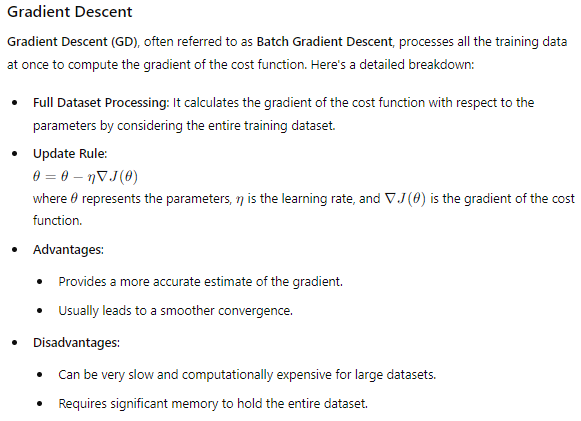

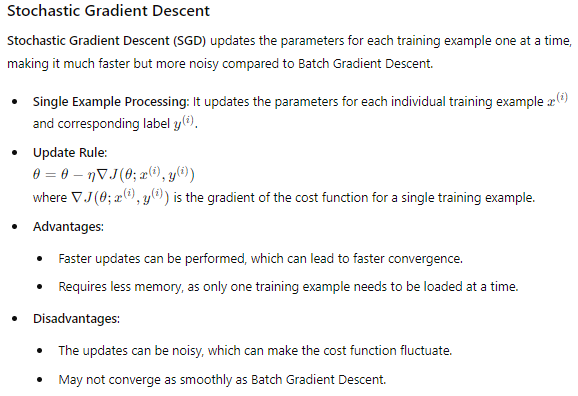

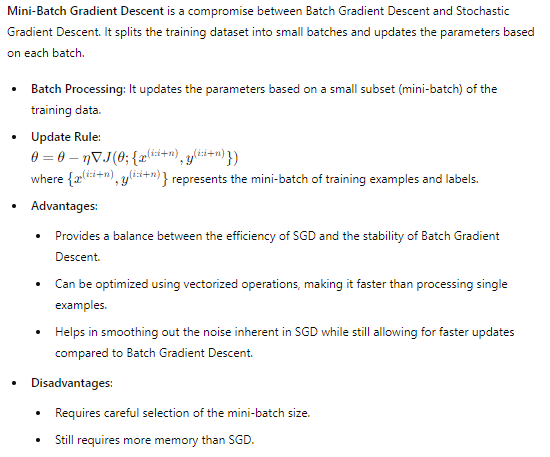

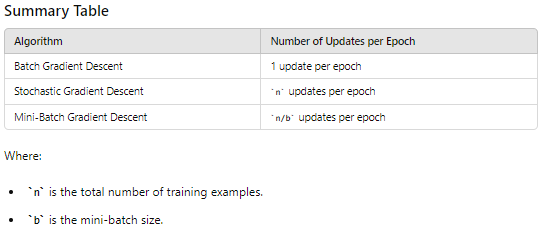

# Regularization

Regularization may be defined as any modification or change in the learning algorithm that helps reduce its error over a test dataset, commonly known as generalization error but not on the supplied or training dataset.

## Overfitting

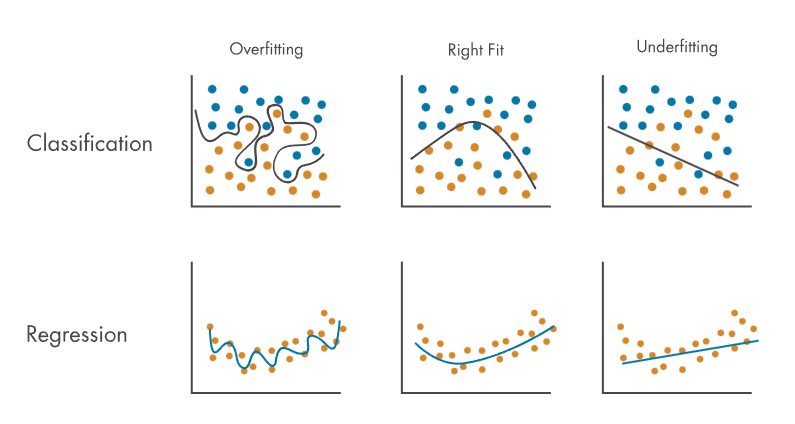

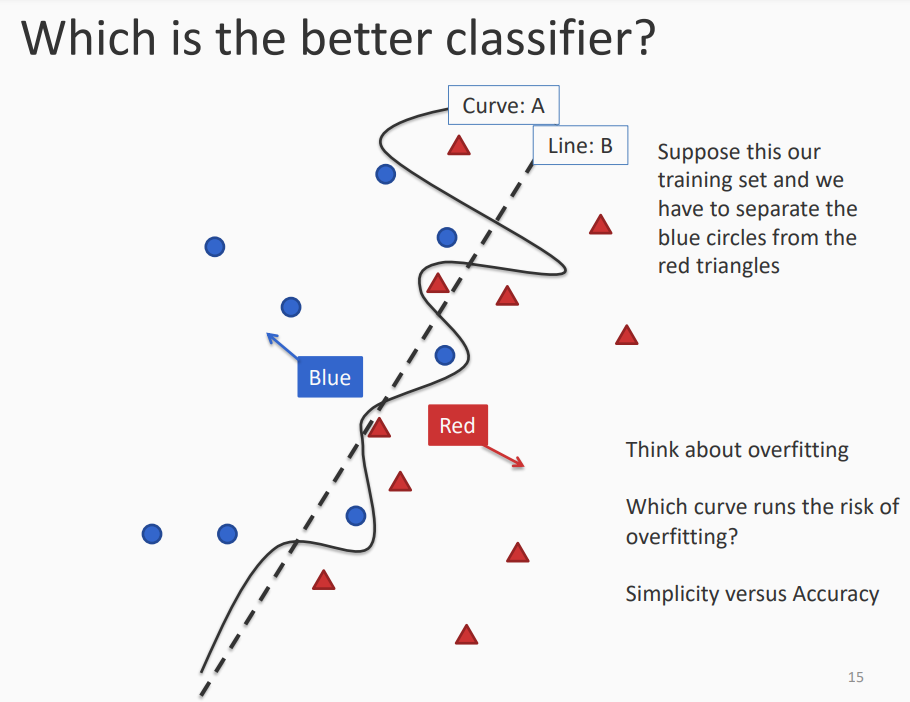

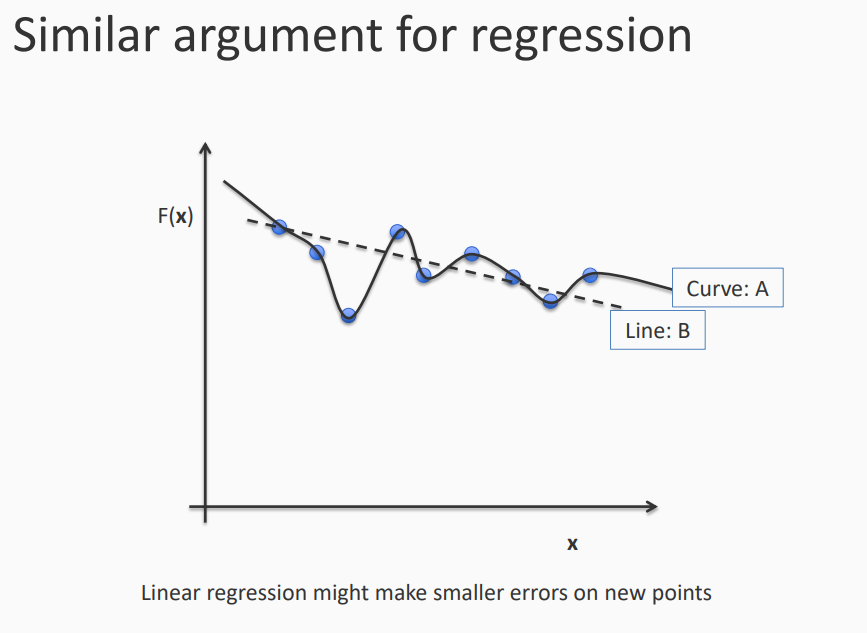

## L1 Parameter (Lasso) Regularization

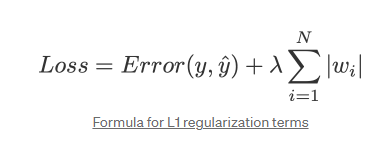

The L1 regularizer basically looks for the parameter vectors that minimize the norm of the parameter vector (the length of the vector). This is essentially the problem of how to optimize the parameters of a single neuron, a single layer neural network in general, and a single layer feed-forward neural network in particular.

## L2 Parameter (Ridge) Regularization

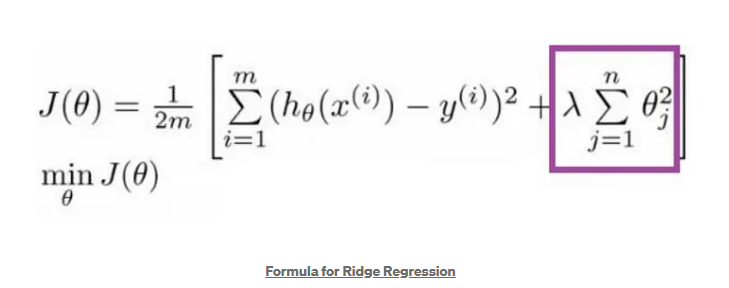

Regularization adds the penalty as model complexity increases. The regularization parameter (lambda) penalizes all the parameters except intercept so that the model generalizes the data and won’t overfit. Ridge regression adds “squared magnitude of the coefficient” as penalty term to the loss function. Here the box part in the above image represents the L2 regularization element/term.

## Dropout

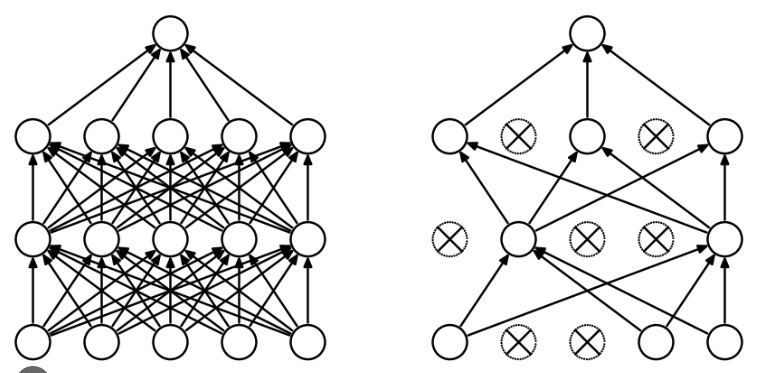

Dropout works by essentially “dropping” a neuron from the input or hidden layers. Multiple neurons are removed from the network, meaning they practically do not exist — their incoming and outcoming connections are also destroyed. This artificially creates a multitude of smaller, less complex networks. This forces the model to not become solely dependent on one neuron, meaning it has to diversify its approach and develop a multitude of methods to achieve the same result. For instance, going back to the horse example, if one neuron is primarily responsible for the tree part of the horse, its being dropped will force the model to focus more on other features of the image. Dropout can also be applied directly to the input neurons, meaning that entire features go missing from the model.

**Recommended Reading on Regularization:**


*   [Regularization — Understanding L1 and L2 regularization for Deep Learning](https://medium.com/analytics-vidhya/regularization-understanding-l1-and-l2-regularization-for-deep-learning-a7b9e4a409bf)
*   [Combating Overfitting with Dropout Regularization](https://towardsdatascience.com/combating-overfitting-with-dropout-regularization-f721e8712fbe)



# Highly Recommended Reading:

These are almost all the major concepts regarding neural network. So I am posting some slides on a detailed and robust mathematical explanation of all the tools you have been introduced so far. So, I strongly recommend you to look into the slides.

[Machine Learning Slides](https://drive.google.com/drive/folders/1ROTVUisIbnZ6H5V-ghWHYZUYMlP5aa5D?usp=sharing)